#  Загрузка и подготовка данных


In [3]:
#Загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [4]:

# Загрузка данных, удаление лишних данных по всем 3 выборкам
column=['0takt','1takt','2takt','3takt','4takt','5takt','6takt','7takt','8takt',
                          '9takt','10takt','11takt','12takt','13takt','14takt','15takt','16takt','17takt']
try:
    df1=pd.read_csv('SOP1.dat',delimiter=' ',encoding='windows-1250',header=None,error_bad_lines=False)

    df2=pd.read_csv('SOP2.dat',delimiter=' ',encoding='windows-1250',header=None,error_bad_lines=False)
    df3=pd.read_csv('SOP3.dat',delimiter=' ',encoding='windows-1250',header=None,error_bad_lines=False)
    print('Данные загруженны ')
except:
    print('Данные не загрузились ')

try:  
    df1=df1.drop([0,0]) # удаление технической строки
    df1=df1.drop(columns=[17,0]) # удаление лишних столбцов,   расстояние мм будет индекс
    df2=df2.drop([0,0]) # удаление технической строки
    df2=df2.drop(columns=[17,0])  # удаление лишних столбцов,   расстояние мм будет индекс 
    df3=df3.drop([0,0]) # удаление технической строки
    df3=df3.drop(columns=[17,0])# удаление лишних столбцов,   расстояние мм будет индекс
    df1=df1.astype("float32")# приводим данные к float
    df2=df2.astype("float32")# приводим данные к float
    df3=df3.astype("float32")# приводим данные к float
    print('Данные  обработаны ')
except:
    print('Данные не обработались ')


    

Данные загруженны 
Данные  обработаны 


C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df3.describe()

In [24]:
df1=pd.read_csv('SOP1.dat',delimiter=' ',skiprows=[0],encoding='windows-1250',header=None,index_col=[0])

In [26]:
df1.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']

In [27]:
df1.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16'],
      dtype='object')

## анализ данных

In [ ]:
# смотрим данные на примере 1 выборки
df1.info()

In [ ]:
# анализ структуры 1 выборки
df1.describe()

In [ ]:
# анализ структуры 2 выборки
df2.describe()

In [ ]:
# анализ структуры 3 выборки
df3.describe()

## Построение графиков

numpy.ndarray

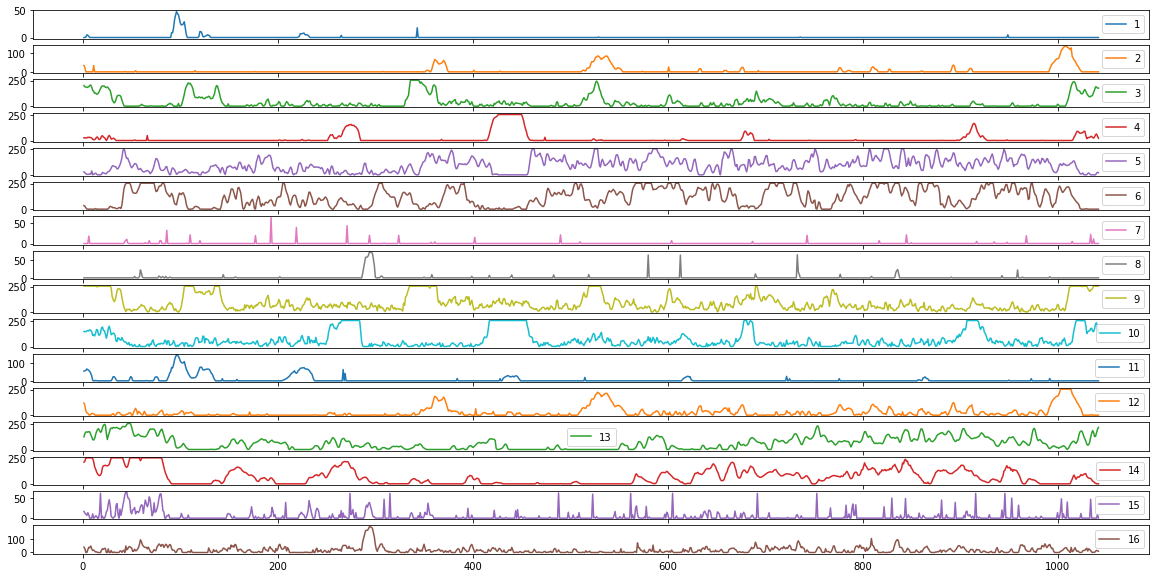

In [57]:
# Построим график значений в координатах  для каждого признака с усреднением. Подставляем датафрейм соответствующий
axes = df1.plot.line(subplots=True,figsize=(20,10))
type(axes)

numpy.ndarray

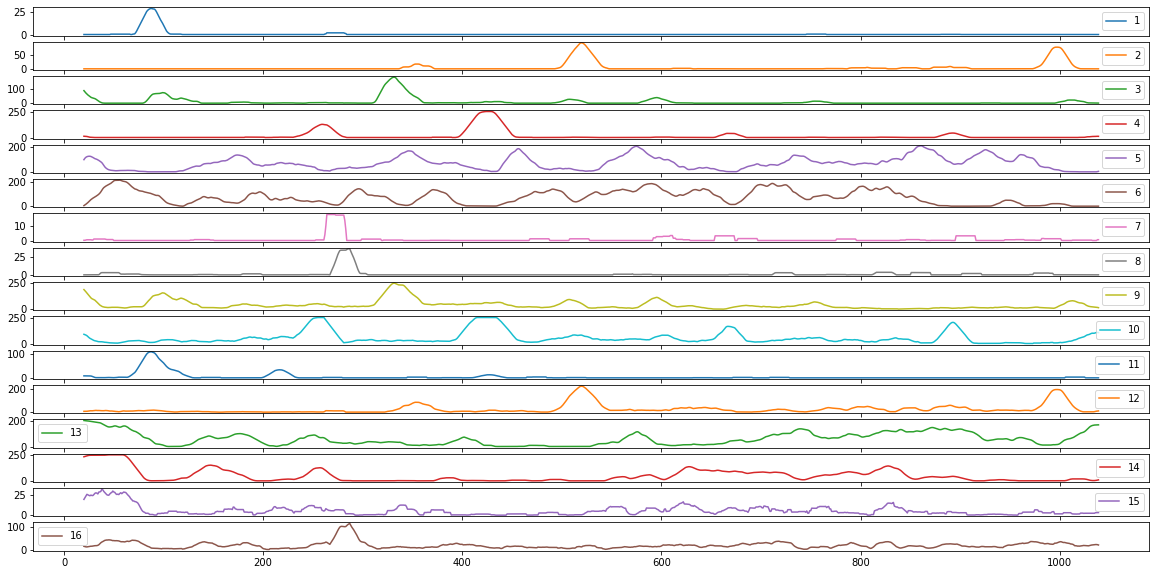

In [62]:
# Построим график значений в координатах  для каждого признака с усреднением. Подставляем датафрейм соответствующий
axes = df2.rolling(20).mean().plot.line(subplots=True,figsize=(20,10))
type(axes)

numpy.ndarray

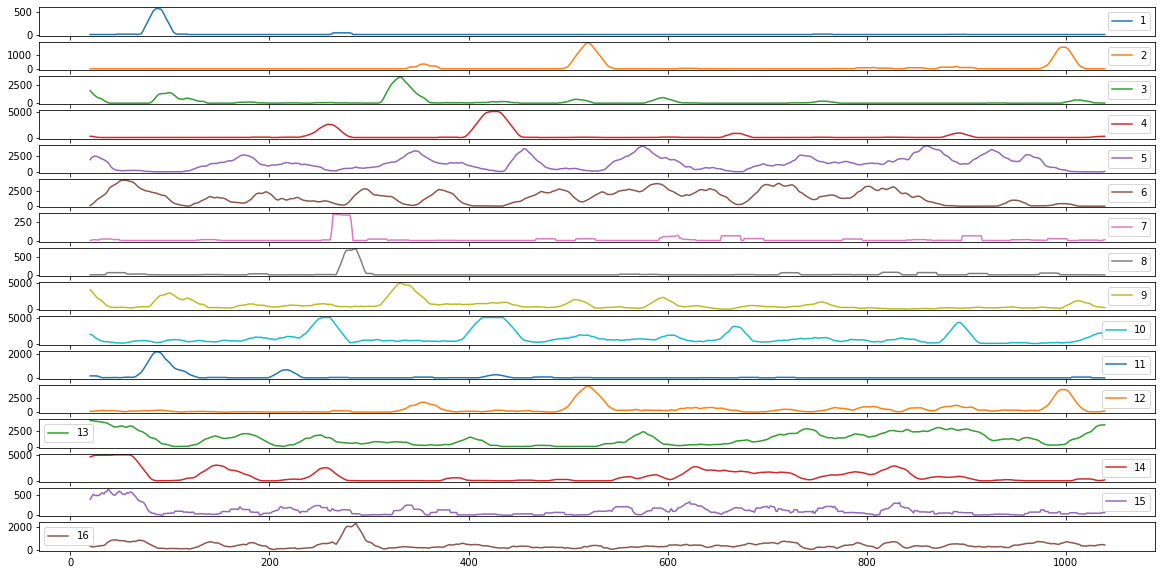

In [8]:
# Построим график значений в координатах  для каждого признака с усреднением. Подставляем датафрейм соответствующий
axes = df2.rolling(20).sum().plot.line(subplots=True,figsize=(20,10))
type(axes)

In [ ]:
# построение гистограмм распределения
type(df2.hist(figsize=(20,10),bins=30))

Такты
1 эхо хордовая А
2 Эхо хородовая Б 
3 эхо хордовая РС сторона А 

In [ ]:
# Построим ящик с усами для определения плотности в данных. Подставляем датафрейм соответствующий
df1.boxplot(figsize=(20,10))

In [5]:
def gr(start,finish):
    # Построим график значений в координатах  для каждого признака. Подставляем датафрейм соответствующий
    axes = df1.loc[start:finish,:].plot.line(subplots=True,figsize=(20,10))
    type(axes)

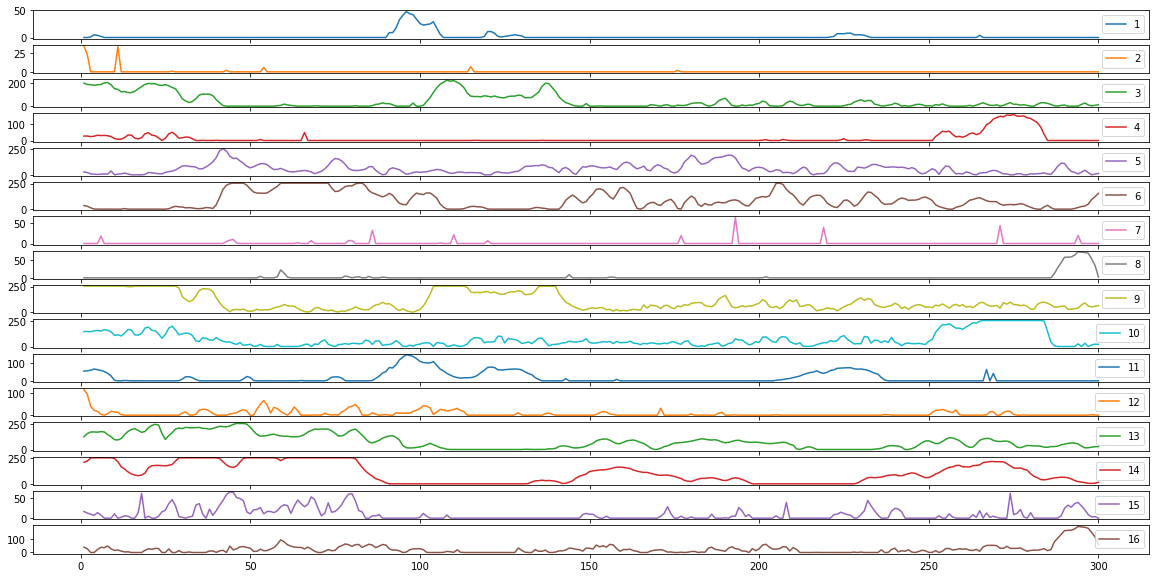

In [6]:
gr(0,300)

In [ ]:
# Построим график значений в координатах  для каждого признака с усреднением. Подставляем датафрейм соответствующий
axes = df1.rolling(20).mean().plot.line(subplots=True,figsize=(20,10))
type(axes)

Признаки эхо-метода. Эхо-метод: 1,2,3,4,7,8
Эхо-контактные :9,10,11,12,15,16 
Признаки теневого метода: 5,6,13,14
Поперечные дефекты 7,8 эхо контактные 15,16


# Modul 2


# Построение корреляционных данных и их визуализация

In [38]:
# анализ корреляции
corr1 = df1[list(df1.columns)].corr()
#corr1=df1.corr(method='pearson', min_periods=1)
corr2=df2.corr(method='pearson', min_periods=1)
corr3=df3.corr(method='pearson', min_periods=1)

In [ ]:
c=round(corr1,1)
sns.heatmap(c)

In [ ]:
sns.clustermap(corr1)

In [ ]:
sns.heatmap(corr1,annot=True)

<AxesSubplot:>

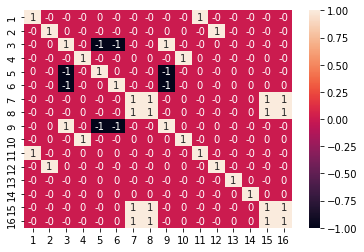

In [55]:
corr3=df3.rolling(25).sum().corr(method='pearson', min_periods=1)
sns.heatmap(round(corr3,0),annot=True)

<AxesSubplot:>

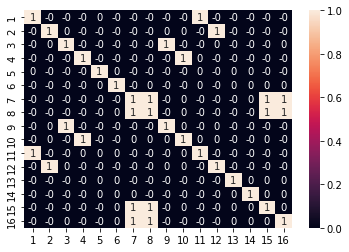

In [41]:
corr3=df2.rolling(30).mean().corr(method='pearson', min_periods=1)
sns.heatmap(round(corr3,0),annot=True)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
1,0,35,202,27,29,35,0,0,255,147,54,119,125,212,17,39
2,0,23,190,27,22,29,0,0,255,147,56,95,156,223,13,27
3,1,0,188,24,10,13,0,0,255,145,59,40,172,254,10,0
4,5,0,183,26,6,1,0,0,255,153,66,22,172,255,7,0
5,4,0,188,32,4,0,0,0,255,157,62,18,170,255,14,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,0,0,159,36,0,0,0,0,255,175,0,0,127,11,0,1
1039,0,0,189,56,0,0,0,0,255,221,0,0,129,6,0,9
1040,0,0,188,64,16,0,0,0,255,232,0,0,163,0,0,15


In [33]:
rolling = df1.rolling (window = 25)
rolling_mean = rolling.mean()
rolling_mean

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,0.0,22.68,151.68,49.20,37.80,33.64,1.52,0.0,246.6,189.08,0.0,65.88,108.76,62.40,2.40,13.32
1039,0.0,17.48,151.44,51.44,33.20,27.76,1.52,0.0,246.6,196.36,0.0,55.92,111.48,61.64,2.40,12.20
1040,0.0,14.08,150.08,54.00,29.00,22.60,1.32,0.0,246.6,203.84,0.0,47.44,115.12,59.84,2.40,12.56


<AxesSubplot:>

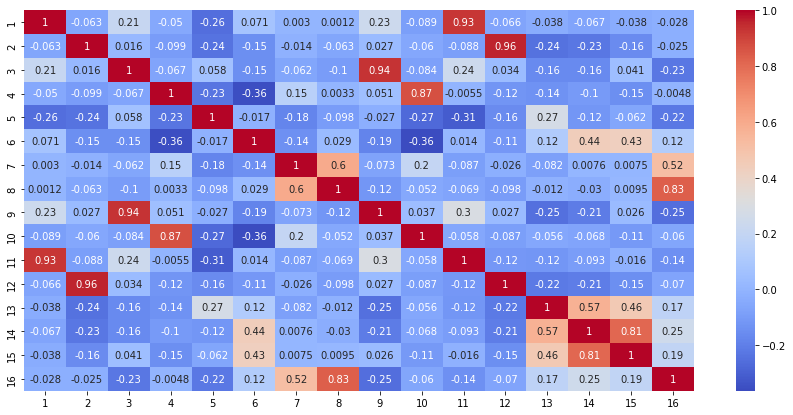

In [37]:
# сглаживание скользящим средним
rolling = df2.rolling (window = 25)
rolling_mean = rolling.mean()

# корреляции
corr = rolling_mean.corr()

import seaborn as sns
fig, ax = plt.subplots(figsize = (15, 7))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', ax = ax)

In [ ]:
# поиск корреляции по столбцам
for n in range(1,17):
    df5=df3.rolling(30,min_periods=1).mean()
    dic={}
    for i in range(0,1200):
        #функция для визуализации определения смещения
        df5[n]=np.roll(df5[n],-1)
        corrr=df5.corr()
        dic[i]=(float(corrr.at[n,4]))
    ssd = sorted(dic, key=dic.__getitem__)
    k = ssd[-1]
    {k: dic[k]}
    print(n,{k: dic[k]})


In [ ]:
df1[2]=np.roll(df1[2],10)


In [ ]:
def corel(sdvig,takt,ser2):
    df5=df2
    df5[takt]=np.roll(df5[takt],sdvig)
    
    sns.heatmap(df5.corr())

In [ ]:
interact (corel,sdvig=widgets.IntSlider(min=1, max=1000, step=1, value=0),takt=widgets.IntSlider(min=1, max=17, step=1, value=1),ser2=widgets.IntSlider(min=1, max=17, step=1, value=1))

Короче, точного соответствия методом расчета, получить не удалось, но с помощью гугла можно найти характеристики этого прибора и смещение составляет между схемами 95 мм. Первые датчики смещены на 50 мм, вторые соответственно на 145 мм.


# Поиск несплошностей

In [ ]:
import plotly.express as px



In [ ]:
df1

In [ ]:
X = df1[['5 (-83)', '6 (-83)', '9 (-83)', '10 (-83)', '11 (-83)', '12', '13', '15 (-83)', '16']]